# Handwritten Digit Classification

- ##### In this part w will train a neural network to predict the digit from 0 to 9 presented as an image to it.
- ##### Our end goal here is not to train the best possible model, but to see how this thing is done so we can better understand how it works behind the scenes in the upcoming parts.
- ##### Here we will be using multi class classification methods.

##### Trained using 55 Epochs.

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Dense,Flatten, Dropout, BatchNormalization

In [14]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data() 
# Being extremely famous it is present as an dataset by deafult in Keras

In [15]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

0

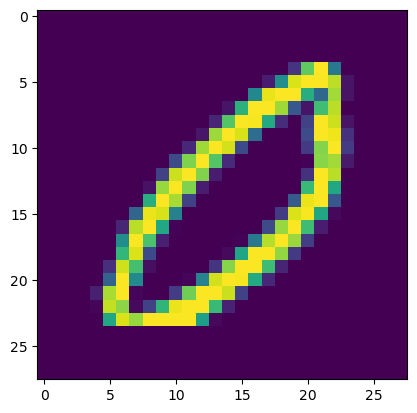

In [16]:
import matplotlib.pyplot as plt

i = 965
plt.imshow(X_train[i])
int(y_train[i])

In [17]:
# Making all pixel values lie between 0 and 1 for fate convergence of neural network.

X_train = X_train / 255
X_test = X_test / 255

<br>

## Model Definition

In [18]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # L2 Regularization
model.add(BatchNormalization())  # Normalizes activations
model.add(Dropout(0.3))  # 30% neurons are dropped
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())  # Normalizes activations
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,578 (412.41 KB)

 Trainable params: 105,258 (411.16 KB)

 Non-trainable params: 320 (1.25 KB)

In [20]:
# 2️⃣ Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# 3️⃣ Early Stopping (Optional)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam', 
    metrics=['accuracy'] 
)

In [57]:
history = model.fit(
    X_train, y_train, batch_size=64, epochs=5, 
    callbacks=[lr_scheduler, early_stopping], validation_split=0.2
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9818 - loss: 0.0950 - val_accuracy: 0.9792 - val_loss: 0.1051 - learning_rate: 1.2500e-04
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9820 - loss: 0.0932 - val_accuracy: 0.9784 - val_loss: 0.1086 - learning_rate: 1.2500e-04
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9798 - loss: 0.0964 - val_accuracy: 0.9793 - val_loss: 0.1053 - learning_rate: 1.2500e-04
Epoch 4/5
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9808 - loss: 0.0909
Epoch 4: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9808 - loss: 0.0909 - val_accuracy: 0.9789 - val_loss: 0.1071 - learning_rate: 1.2500e-04
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9819 - loss: 0.0902 - val_accuracy: 0.9807 - val_loss: 0.1043 - learning_rate: 6.2500e-05


In [60]:
model.save("my_model.keras")

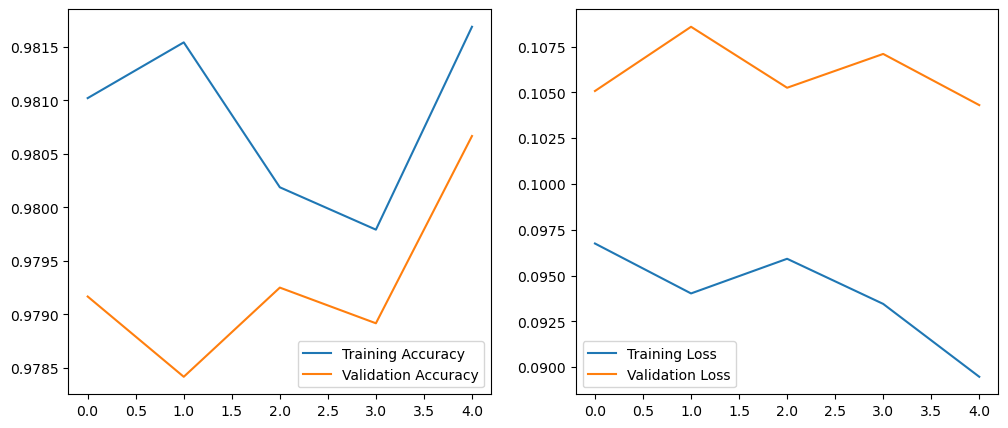

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()

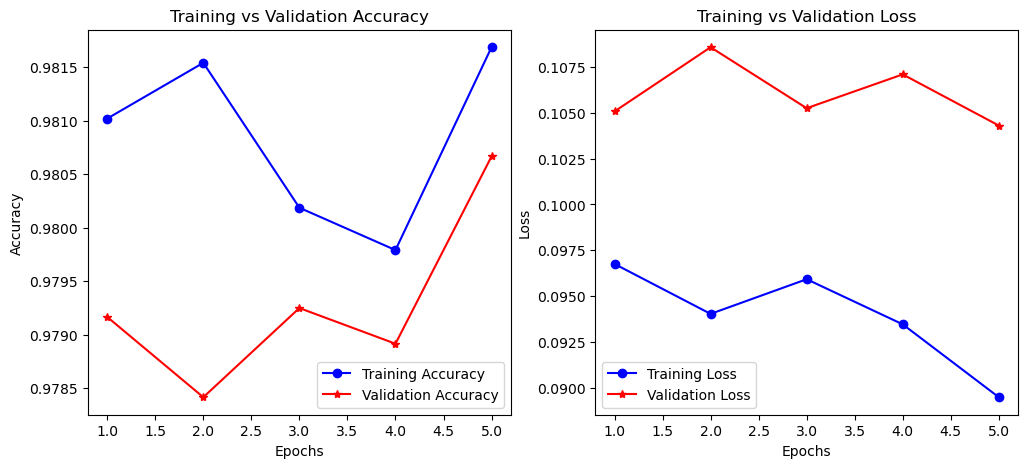

In [59]:
history_dict = history.history

# Extract values
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


<br>

# Getting Predictions

In [61]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [62]:
y_pred = y_prob.argmax(axis=1)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9823

<br>

# Getting Indivisual Predictions


In [40]:
X_test.shape

(10000, 28, 28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

This Number Is: 4



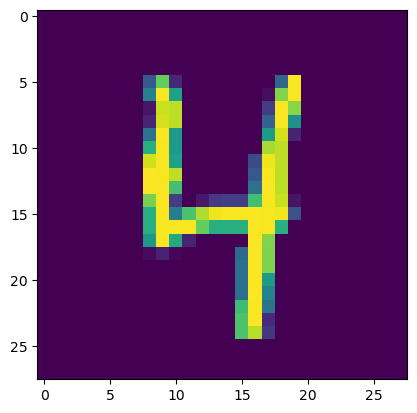

In [49]:
i = 1323
plt.imshow(X_test[i])
pred = model.predict(X_test[i].reshape((1, 28, 28))).argmax()
print("\nThis Number Is:",pred, end="\n\n")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


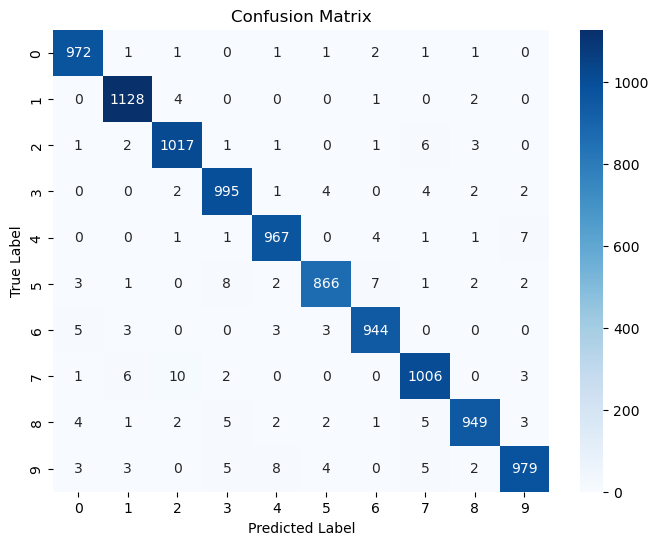

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred_prob = model.predict(X_test)  # Replace X_test with your actual test data
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert to class labels
class_labels = [str(i) for i in range(10)]  # For digits 0-9

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Replace y_test with actual labels

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [68]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true labels and model predictions
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9828    0.9918    0.9873       980
           1     0.9852    0.9938    0.9895      1135
           2     0.9807    0.9855    0.9831      1032
           3     0.9784    0.9851    0.9817      1010
           4     0.9817    0.9847    0.9832       982
           5     0.9841    0.9709    0.9774       892
           6     0.9833    0.9854    0.9844       958
           7     0.9776    0.9786    0.9781      1028
           8     0.9865    0.9743    0.9804       974
           9     0.9829    0.9703    0.9766      1009

    accuracy                         0.9823     10000
   macro avg     0.9823    0.9820    0.9822     10000
weighted avg     0.9823    0.9823    0.9823     10000

